In [31]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
def xi(w): 
    if w <= 0:
        return 0
    else:
        return np.inf

In [33]:
w = 0
g = 100000
xi(w) >= g * w

True

## Q2

In [34]:
X = np.array([v for v in product(*([0, 1], ) * 3)])
X

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [35]:
y = np.array([0, 0, 0, 0, 0, 0, 1, 1])

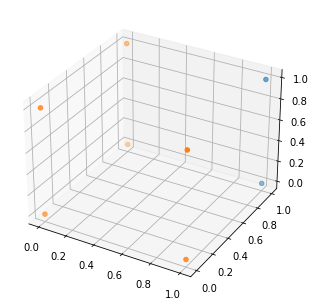

In [36]:
colors = ["tab:blue" if yn == 1 else "tab:orange" for yn in y]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(*X.T, c=colors);

In [29]:
def heaviside(a): return 1 * (a >= 0)

def perceptron(X, y, nits=200, r=1):
    N, M = X.shape
    w = np.zeros(M)
    for n in range(nits):
        for xn, yn in zip(X, y):
            yn_hat = heaviside(xn @ w)
            w = w + r * (yn - yn_hat) * xn
    return w

In [37]:
Phi = np.c_[np.ones(8), X]
w_perceptron = perceptron(Phi, y)
w_perceptron

array([-3.,  2.,  1.,  0.])

In [38]:
Phi @ w_perceptron

array([-3., -3., -2., -2., -1., -1.,  0.,  0.])

In [39]:
# Check that we recover the intended datapoints
heaviside(Phi @ w_perceptron)

array([0, 0, 0, 0, 0, 0, 1, 1])

## b)

In [43]:
names = np.array(["Border Collie", "Siberian Husky", "Great Dane", "British Shorthair", "Siamese"])
len(names)

5

In [44]:
for i, name in enumerate(sorted(names)):
    print(i+1, name)

1 Border Collie
2 British Shorthair
3 Great Dane
4 Siamese
5 Siberian Husky


In [47]:
w = np.array([64, 81, 1, 9, 16, 9, 81, 64, 64])
np.sqrt(w)

array([8., 9., 1., 3., 4., 3., 9., 8., 8.])

In [53]:
edges = np.array([
    [1, 2],
    [2, 4],
    [1, 4],
    [4, 5],
    [2, 5],
    [2, 3],
    [1, 5],
    [3, 5],
    [1, 3]
]) - 1

edges.shape

(9, 2)

In [54]:
n_nodes = len(np.unique(edges))
n_edges = len(w)

In [55]:
Mw = np.zeros((n_edges, n_nodes))
for i, (wn, (e1, e2)) in enumerate(zip(w, edges)):
    Mw[i, e1] = - np.sqrt(wn)
    Mw[i, e2] = np.sqrt(wn)

Mw

array([[-8.,  8.,  0.,  0.,  0.],
       [ 0., -9.,  0.,  9.,  0.],
       [-1.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -3.,  3.],
       [ 0., -4.,  0.,  0.,  4.],
       [ 0., -3.,  3.,  0.,  0.],
       [-9.,  0.,  0.,  0.,  9.],
       [ 0.,  0., -8.,  0.,  8.],
       [-8.,  0.,  8.,  0.,  0.]])

In [72]:
Mw.shape

(9, 5)

In [73]:
Lw = Mw.T @ Mw
Lw

array([[210., -64., -64.,  -1., -81.],
       [-64., 170.,  -9., -81., -16.],
       [-64.,  -9., 137.,   0., -64.],
       [ -1., -81.,   0.,  91.,  -9.],
       [-81., -16., -64.,  -9., 170.]])

In [74]:
known = np.array([3, 4]) - 1
unknown = np.array([1, 2, 5]) - 1
y = np.array([1, 0])

PR = np.zeros((known.shape[0], n_nodes))
PR_perp = np.zeros((n_nodes - known.shape[0], n_nodes))

PR[[0,1], known] = 1

PR_perp[[0,1,2], unknown] = 1

In [78]:
Lw

array([[210., -64., -64.,  -1., -81.],
       [-64., 170.,  -9., -81., -16.],
       [-64.,  -9., 137.,   0., -64.],
       [ -1., -81.,   0.,  91.,  -9.],
       [-81., -16., -64.,  -9., 170.]])

In [77]:
PR

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [75]:
PR_perp

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [76]:
np.linalg.inv(PR_perp @ Lw @ PR_perp.T)

array([[0.0070942 , 0.00301561, 0.003664  ],
       [0.00301561, 0.0072168 , 0.00211608],
       [0.003664  , 0.00211608, 0.0078273 ]])

In [67]:
-PR_perp @ Lw.T @ PR.T @ y

array([64.,  9., 64.])

In [68]:
labels = PR_perp.T @ (-np.linalg.inv(PR_perp @ Lw @ PR_perp.T) @ PR_perp @ Lw.T @ PR.T @ y)
labels[known] = y
labels

array([0.71566565, 0.39337889, 1.        , 0.        , 0.75448812])

In [69]:
classes = labels > 0.5
labels[classes]

array([0.71566565, 1.        , 0.75448812])

In [70]:
np.sort(names)[classes]

array(['Border Collie', 'Great Dane', 'Siberian Husky'], dtype='<U17')

In [71]:
np.sort(names)[~classes]

array(['British Shorthair', 'Siamese'], dtype='<U17')

## Clustering

In [517]:
from numpy.linalg import norm
from sklearn.preprocessing import OneHotEncoder
%precision 2

n_clusters = 2
classes = np.arange(n_clusters)
ohe = OneHotEncoder(categories=[classes], sparse=False)

In [518]:
d = 1

# NxM
X = np.array([
    [1, 0],
    [-7, 3],
    [0, -1],
    [13, 15],
    [-11, 17]
])

# KxM
mu = np.array([
    [d, 0],
    [0, -d]
]).T

In [519]:
(X[0] + X[3] + X[4])/ 3

array([ 1.  , 10.67])

In [520]:
(X[1] + X[2]) / 2

array([-3.5,  1. ])

In [521]:
mu

array([[ 1,  0],
       [ 0, -1]])

### First Iteration

In [522]:
distances = norm(X[..., None] - mu, axis=1)
distances

array([[ 0.  ,  1.41],
       [ 8.54,  8.06],
       [ 1.41,  0.  ],
       [19.21, 20.62],
       [20.81, 21.1 ]])

In [523]:
e_step = distances.argmin(axis=1)
e_step

array([0, 1, 1, 0, 0])

In [524]:
mu = ohe.fit_transform(e_step[:, None])
mu

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [525]:
mu = (X[:, None, :] * mu[..., None]).sum(axis=0) / mu.sum(axis=0, keepdims=True).T
mu = mu.T
mu

array([[ 1.  , -3.5 ],
       [10.67,  1.  ]])

### Second iteration

In [528]:
distances = norm(X[..., None] - mu, axis=1)
distances

array([[10.67,  4.61],
       [11.08,  4.03],
       [11.71,  4.03],
       [12.76, 21.64],
       [13.57, 17.67]])

In [529]:
e_step = distances.argmin(axis=1)
e_step

array([1, 1, 1, 0, 0])

In [530]:
mu = ohe.fit_transform(e_step[:, None])
mu

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [531]:
mu = (X[:, None, :] * mu[..., None]).sum(axis=0) / mu.sum(axis=0, keepdims=True).T
mu = mu.T
mu

array([[ 1.  , -2.  ],
       [16.  ,  0.67]])

### Third iteration

In [532]:
distances = norm(X[..., None] - mu, axis=1)
distances

array([[16.  ,  3.07],
       [15.26,  5.52],
       [17.03,  2.6 ],
       [12.04, 20.75],
       [12.04, 18.65]])

In [533]:
e_step = distances.argmin(axis=1)
e_step

array([1, 1, 1, 0, 0])

In [534]:
mu = ohe.fit_transform(e_step[:, None])
mu

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [535]:
mu = (X[:, None, :] * mu[..., None]).sum(axis=0) / mu.sum(axis=0, keepdims=True).T
mu = mu.T
mu

array([[ 1.  , -2.  ],
       [16.  ,  0.67]])

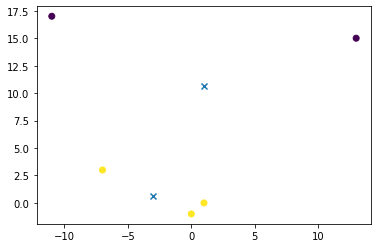

In [446]:
plt.scatter(*X.T, c=e_step)
plt.scatter(*mu, marker="x")

In [447]:
from sklearn.cluster import KMeans
d = 1
mu0 = np.array([
    [d, 0],
    [0, -d]
])

km = KMeans(n_clusters=2, init=mu0, n_init=1, max_iter=4)
km.fit(X)
km.cluster_centers_

array([[ 1.  , 16.  ],
       [-2.  ,  0.67]])

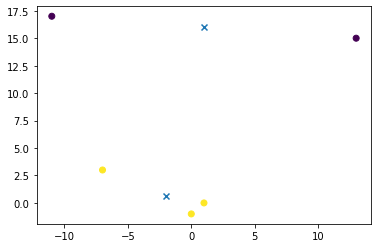

In [543]:
plt.scatter(*X.T, c=e_step)
plt.scatter(*km.cluster_centers_.T, marker="x")

In [545]:
km.cluster_centers_

array([[ 1.  , 16.  ],
       [-2.  ,  0.67]])